<a href="https://colab.research.google.com/github/bmchandra/Gen-AI/blob/main/fine_tuning_transformers_with_custom_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install transformers datasets -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 23.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 16.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 16.3 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.5.1+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is incompatible.
torch 2.5.1+cu124 requires nvidia-cuda-cupti-cu12==12.4.127; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cuda-cupti-cu12 12.5.82 which is incompatible.
torch 2.5.1+cu124 requires nvidia-cuda-nvrtc-cu12=

In [81]:
import numpy as np
from sklearn.metrics import f1_score,accuracy_score,confusion_matrix

In [32]:
from datasets import load_dataset

In [33]:
ds = load_dataset("osanseviero/twitter-airline-sentiment")

In [34]:
ds

DatasetDict({
    train: Dataset({
        features: ['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence', 'negativereason', 'negativereason_confidence', 'airline', 'airline_sentiment_gold', 'name', 'negativereason_gold', 'retweet_count', 'text', 'tweet_coord', 'tweet_created', 'tweet_location', 'user_timezone'],
        num_rows: 14640
    })
})

In [35]:
# First, split into train (80%) and test (20%)
train_test = ds["train"].train_test_split(test_size=0.2, seed=42)

# Next, split the test set into validation (50%) and test (50%)
valid_test = train_test["test"].train_test_split(test_size=0.5, seed=42)




In [36]:
print(train_test)
print(valid_test)

DatasetDict({
    train: Dataset({
        features: ['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence', 'negativereason', 'negativereason_confidence', 'airline', 'airline_sentiment_gold', 'name', 'negativereason_gold', 'retweet_count', 'text', 'tweet_coord', 'tweet_created', 'tweet_location', 'user_timezone'],
        num_rows: 11712
    })
    test: Dataset({
        features: ['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence', 'negativereason', 'negativereason_confidence', 'airline', 'airline_sentiment_gold', 'name', 'negativereason_gold', 'retweet_count', 'text', 'tweet_coord', 'tweet_created', 'tweet_location', 'user_timezone'],
        num_rows: 2928
    })
})
DatasetDict({
    train: Dataset({
        features: ['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence', 'negativereason', 'negativereason_confidence', 'airline', 'airline_sentiment_gold', 'name', 'negativereason_gold', 'retweet_count', 'text', 'tweet_coord', 'tweet_created', 'tweet

In [37]:
# # Combine everything into a new DatasetDict
dataset_split = {
    "train": train_test["train"],   # 80% of original data
    "validation": valid_test["train"],  # 10% of original data
    "test": valid_test["test"]  # 10% of original data
}


In [38]:
dataset_split

{'train': Dataset({
     features: ['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence', 'negativereason', 'negativereason_confidence', 'airline', 'airline_sentiment_gold', 'name', 'negativereason_gold', 'retweet_count', 'text', 'tweet_coord', 'tweet_created', 'tweet_location', 'user_timezone'],
     num_rows: 11712
 }),
 'validation': Dataset({
     features: ['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence', 'negativereason', 'negativereason_confidence', 'airline', 'airline_sentiment_gold', 'name', 'negativereason_gold', 'retweet_count', 'text', 'tweet_coord', 'tweet_created', 'tweet_location', 'user_timezone'],
     num_rows: 1464
 }),
 'test': Dataset({
     features: ['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence', 'negativereason', 'negativereason_confidence', 'airline', 'airline_sentiment_gold', 'name', 'negativereason_gold', 'retweet_count', 'text', 'tweet_coord', 'tweet_created', 'tweet_location', 'user_timezone'],
     num_rows: 146

In [39]:

# # Convert to DatasetDict
from datasets import DatasetDict
dataset_split = DatasetDict(dataset_split)


# # Print the final dataset
print(dataset_split)

DatasetDict({
    train: Dataset({
        features: ['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence', 'negativereason', 'negativereason_confidence', 'airline', 'airline_sentiment_gold', 'name', 'negativereason_gold', 'retweet_count', 'text', 'tweet_coord', 'tweet_created', 'tweet_location', 'user_timezone'],
        num_rows: 11712
    })
    validation: Dataset({
        features: ['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence', 'negativereason', 'negativereason_confidence', 'airline', 'airline_sentiment_gold', 'name', 'negativereason_gold', 'retweet_count', 'text', 'tweet_coord', 'tweet_created', 'tweet_location', 'user_timezone'],
        num_rows: 1464
    })
    test: Dataset({
        features: ['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence', 'negativereason', 'negativereason_confidence', 'airline', 'airline_sentiment_gold', 'name', 'negativereason_gold', 'retweet_count', 'text', 'tweet_coord', 'tweet_created', 'tweet_location', 

In [40]:
model_chk_pt = 'distilbert-base-cased'

In [41]:
from transformers import AutoTokenizer

In [42]:
tokenizer = AutoTokenizer.from_pretrained(model_chk_pt)

In [43]:
def tokenize_fn(batch):
  return tokenizer(batch['text'],padding=True, truncation=True) #,max_length=128)

In [44]:
tokenized_datasets = dataset_split.map(tokenize_fn, batched=False)

Map:   0%|          | 0/1464 [00:00<?, ? examples/s]

In [45]:
tokenized_datasets

DatasetDict({
    train: Dataset({
        features: ['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence', 'negativereason', 'negativereason_confidence', 'airline', 'airline_sentiment_gold', 'name', 'negativereason_gold', 'retweet_count', 'text', 'tweet_coord', 'tweet_created', 'tweet_location', 'user_timezone', 'input_ids', 'attention_mask'],
        num_rows: 11712
    })
    validation: Dataset({
        features: ['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence', 'negativereason', 'negativereason_confidence', 'airline', 'airline_sentiment_gold', 'name', 'negativereason_gold', 'retweet_count', 'text', 'tweet_coord', 'tweet_created', 'tweet_location', 'user_timezone', 'input_ids', 'attention_mask'],
        num_rows: 1464
    })
    test: Dataset({
        features: ['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence', 'negativereason', 'negativereason_confidence', 'airline', 'airline_sentiment_gold', 'name', 'negativereason_gold', 'retweet_coun

In [46]:
def rename_label_column(example):
    example["label"] = example["airline_sentiment"]
    return example

In [47]:
label_mapping = {"negative": 0, "neutral": 1, "positive": 2}
def convert_labels(example):
    example["labels"] = label_mapping[example["airline_sentiment"]]  # Convert to integer
    return example

In [48]:
tokenized_datasets = tokenized_datasets.map(convert_labels)

Map:   0%|          | 0/1464 [00:00<?, ? examples/s]

In [49]:
tokenized_datasets

DatasetDict({
    train: Dataset({
        features: ['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence', 'negativereason', 'negativereason_confidence', 'airline', 'airline_sentiment_gold', 'name', 'negativereason_gold', 'retweet_count', 'text', 'tweet_coord', 'tweet_created', 'tweet_location', 'user_timezone', 'input_ids', 'attention_mask', 'labels'],
        num_rows: 11712
    })
    validation: Dataset({
        features: ['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence', 'negativereason', 'negativereason_confidence', 'airline', 'airline_sentiment_gold', 'name', 'negativereason_gold', 'retweet_count', 'text', 'tweet_coord', 'tweet_created', 'tweet_location', 'user_timezone', 'input_ids', 'attention_mask', 'labels'],
        num_rows: 1464
    })
    test: Dataset({
        features: ['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence', 'negativereason', 'negativereason_confidence', 'airline', 'airline_sentiment_gold', 'name', 'negativereason_

In [50]:
from transformers import AutoModelForSequenceClassification, Trainer,TrainingArguments

In [51]:
model = AutoModelForSequenceClassification.from_pretrained(model_chk_pt, num_labels=3)

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-cased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [52]:
!pip install torchinfo

In [53]:
from torchinfo import summary

In [54]:
summary(model)

Layer (type:depth-idx)                                  Param #
DistilBertForSequenceClassification                     --
├─DistilBertModel: 1-1                                  --
│    └─Embeddings: 2-1                                  --
│    │    └─Embedding: 3-1                              22,268,928
│    │    └─Embedding: 3-2                              393,216
│    │    └─LayerNorm: 3-3                              1,536
│    │    └─Dropout: 3-4                                --
│    └─Transformer: 2-2                                 --
│    │    └─ModuleList: 3-5                             42,527,232
├─Linear: 1-2                                           590,592
├─Linear: 1-3                                           2,307
├─Dropout: 1-4                                          --
Total params: 65,783,811
Trainable params: 65,783,811
Non-trainable params: 0

In [55]:
def compute_metrics(logits_and_labels):
  logits, labels = logits_and_labels
  predictions = np.argmax(logits, axis=-1)
  acc = np.mean(predictions == labels)
  f1 = f1_score(labels, predictions, average='macro')
  return {'accuracy': acc, 'f1': f1}

In [56]:
training_args= TrainingArguments(output_dir='./contents/training_dir',
                                 eval_strategy='epoch',
                                  save_strategy='epoch',
                                  num_train_epochs=3,
                                  per_device_train_batch_size=16,
                                  per_device_eval_batch_size=64,
                                 report_to='none'
                                  )

In [58]:
trainer = Trainer(model=model,
                  args=training_args,
                  train_dataset=tokenized_datasets['train'],
                  eval_dataset=tokenized_datasets['test'],
                  tokenizer=tokenizer,
                  compute_metrics=compute_metrics,
                  )

<ipython-input-58-44254a417f7b>:1: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(model=model,


In [59]:
trainer.train()

Epoch,Training Loss,Validation Loss,Accuracy,F1
1,0.560400,0.440458,0.834699,0.770741
2,0.379900,0.433288,0.848361,0.789970
3,0.172400,0.583628,0.849727,0.796110


TrainOutput(global_step=2196, training_loss=0.33548488860139, metrics={'train_runtime': 196.4646, 'train_samples_per_second': 178.841, 'train_steps_per_second': 11.178, 'total_flos': 443856493031040.0, 'train_loss': 0.33548488860139, 'epoch': 3.0})

In [61]:
from transformers import pipeline

In [66]:
!ls contents/training_dir


checkpoint-1464  checkpoint-2196  checkpoint-732


In [67]:
saved_model_path = './contents/training_dir/checkpoint-1464'
saved_model = pipeline('text-classification', model=saved_model_path, device=0)

Device set to use cuda:0


In [68]:
tokenized_datasets['test']

Dataset({
    features: ['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence', 'negativereason', 'negativereason_confidence', 'airline', 'airline_sentiment_gold', 'name', 'negativereason_gold', 'retweet_count', 'text', 'tweet_coord', 'tweet_created', 'tweet_location', 'user_timezone', 'input_ids', 'attention_mask', 'labels'],
    num_rows: 1464
})

In [69]:
test_pred = saved_model(tokenized_datasets['test']['text'])
test_pred

[{'label': 'LABEL_1', 'score': 0.7064070701599121},
 {'label': 'LABEL_0', 'score': 0.9949570298194885},
 {'label': 'LABEL_1', 'score': 0.8847076892852783},
 {'label': 'LABEL_0', 'score': 0.9970722198486328},
 {'label': 'LABEL_0', 'score': 0.5894785523414612},
 {'label': 'LABEL_0', 'score': 0.9935698509216309},
 {'label': 'LABEL_2', 'score': 0.9497244954109192},
 {'label': 'LABEL_1', 'score': 0.6090197563171387},
 {'label': 'LABEL_0', 'score': 0.956213116645813},
 {'label': 'LABEL_1', 'score': 0.6920790076255798},
 {'label': 'LABEL_0', 'score': 0.5214348435401917},
 {'label': 'LABEL_0', 'score': 0.9763681888580322},
 {'label': 'LABEL_0', 'score': 0.9271283149719238},
 {'label': 'LABEL_2', 'score': 0.8263742923736572},
 {'label': 'LABEL_2', 'score': 0.5460348725318909},
 {'label': 'LABEL_0', 'score': 0.995370090007782},
 {'label': 'LABEL_0', 'score': 0.997565507888794},
 {'label': 'LABEL_0', 'score': 0.9910849928855896},
 {'label': 'LABEL_0', 'score': 0.9240752458572388},
 {'label': 'LAB

In [76]:
def get_label_id(sample):
  return int(sample['label'].split('_')[1])

In [77]:
test_pred_labels = [get_label_id(sample) for sample in test_pred]
test_pred_labels

[1,
 0,
 1,
 0,
 0,
 0,
 2,
 1,
 0,
 1,
 0,
 0,
 0,
 2,
 2,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 2,
 2,
 0,
 2,
 1,
 2,
 1,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 1,
 2,
 0,
 0,
 0,
 1,
 0,
 0,
 2,
 0,
 0,
 0,
 2,
 2,
 1,
 0,
 2,
 2,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 2,
 1,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 2,
 0,
 0,
 1,
 0,
 2,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 2,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 1,
 2,
 2,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 1,
 2,
 2,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 2,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [79]:
print('acc:',accuracy_score(tokenized_datasets['test']['labels'],test_pred_labels))
print('f1:',f1_score(tokenized_datasets['test']['labels'],test_pred_labels,average='macro'))

acc: 0.8483606557377049
f1: 0.7899703473210282


In [85]:
import seaborn as sn
import pandas as pd

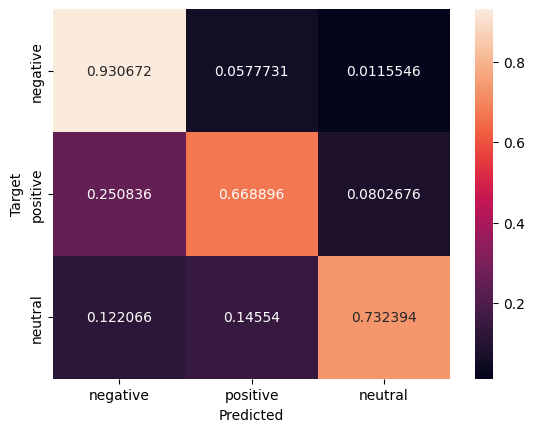

In [87]:
# The changes modify how confusion matrices are plotted
def plot_cm(cm):
  classes = ['negative', 'positive', 'neutral']
  df_cm = pd.DataFrame(cm, index=classes, columns=classes)
  ax = sn.heatmap(df_cm, annot=True, fmt='g')
  ax.set_xlabel("Predicted")
  ax.set_ylabel("Target")

cm = confusion_matrix(tokenized_datasets['test']['labels'], test_pred_labels, normalize='true')
plot_cm(cm)

Ref:<br>
deeplearningcourses.com<br>
huggingface<br>
stackoverflow